Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')


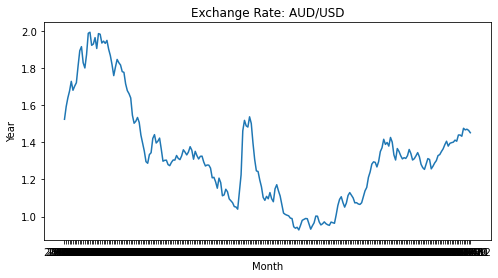

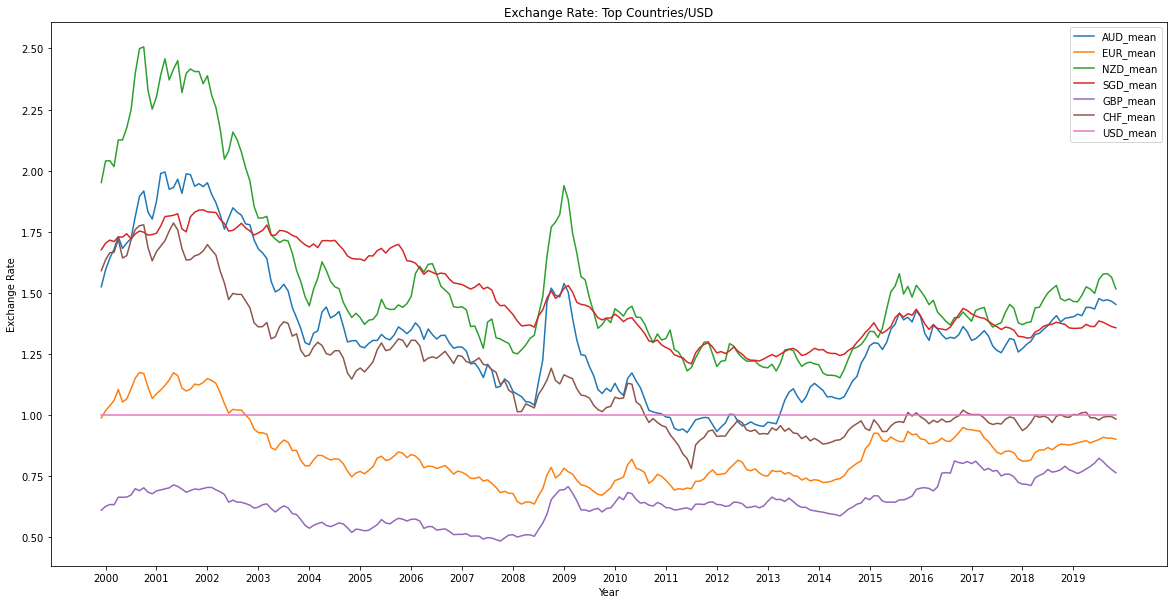

In [1]:
%run Foreign-Exchange-Rates-Prediction-Part1.ipynb

## Machine Learning Models:

### Linear Regression

In [2]:
# Importing the Interest Rate Differential
ir_df = pd.read_csv('InterestRate.csv')
ir_df.head()

,Date,Long Carry,Short Carry
0,01-01-2017,0.65%,-2.42%
1,02-01-2017,0.78%,-2.50%
2,03-01-2017,0.66%,-2.38%
3,04-01-2017,0.34%,-2.10%
4,05-01-2017,0.32%,-2.22%


In [3]:
# converting the date to 'YYYY-MM-DD' format
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
ir_df.head()

,Date,Long Carry,Short Carry
0,2017-01-01,0.65%,-2.42%
1,2017-02-01,0.78%,-2.50%
2,2017-03-01,0.66%,-2.38%
3,2017-04-01,0.34%,-2.10%
4,2017-05-01,0.32%,-2.22%


In [4]:
# using Long Carry to tranasform the data for the analysis
# removing the percentage from the numbers and then converting them to float
# and reshaping 1D to 2D array
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype('float')
x_ir = np.array(x_ir).reshape(-1,1)
x_ir

array([[ 0.65],
       [ 0.78],
       [ 0.66],
       [ 0.34],
       [ 0.32],
       [ 0.27],
       [ 0.09],
       [-0.01],
       [-0.14],
       [-0.09],
       [-0.13],
       [-0.34],
       [-0.59],
       [-0.47],
       [-0.54],
       [-0.38],
       [-0.65],
       [-0.8 ],
       [-0.65],
       [-0.96],
       [-0.95],
       [-1.  ],
       [-1.25],
       [-1.35],
       [-1.39],
       [-1.42],
       [-1.83],
       [-1.79],
       [-1.69],
       [-1.95],
       [-1.99],
       [-2.23],
       [-2.23],
       [-2.15],
       [-2.11],
       [-2.12]])

In [5]:
# filtering the above years i.e from 2017-2019 from the original dataset
aud_usd_fx = df_groupby_aud[(df_groupby_aud['month_year'] >= '2017-01') & (df_groupby_aud['month_year'] <= '2019-12')].reset_index(drop=True)
aud_usd = aud_usd_fx['AUD_USD']
y_fx = aud_usd

In [6]:
y_fx.head()

0    1.339942
1    1.304800
2    1.311987
3    1.327435
4    1.344709
Name: AUD_USD, dtype: float64

In [7]:
# Linear Regression with 1 independent variable (interest rate)
# Year: 2017 - 2019

#x_ir = Inerest Rate
#y_fx = Exchange Rate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, test_size=0.2, random_state=1)

model = LinearRegression()

#training the model with the training datset and predicting with x_test
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print()

# Accuracy of the training and testing dataset
print('R-squared of training data is: ', model.score(x_train, y_train))
print('R-squared of testing data is: ', model.score(x_test, y_test))

[1.42759002 1.43493561 1.40922605 1.28496315 1.36454037 1.35474625
 1.3669889  1.38841354]

R-squared of training data is:  0.6947623687482267
R-squared of testing data is:  0.6776295453826162


Since the percentage between training and testing data is pretty much close, meaning that the accuracy of the model is relatively good

Since the dataset is too small(n = 36), let's see what is the score if the dataset is not splitted at all

In [8]:
# Linear Regression model without splitting the dataset
model = LinearRegression()
model.fit(x_ir, y_fx)

# predicting the exchange rate(y) with the help of interest rate(x)
y_fx_predict = model.predict(x_ir)
print(y_fx_predict)

print()

# Accuracy
print('R-squared of the entire dataset is: ',model.score(x_ir, y_fx))

[1.26817503 1.26008162 1.26755246 1.28747469 1.28871983 1.29183268
 1.30303893 1.30926463 1.31735804 1.31424519 1.31673547 1.32980943
 1.34537367 1.33790284 1.34226082 1.33229971 1.34910909 1.35844763
 1.34910909 1.36840875 1.36778618 1.37089903 1.38646327 1.39268897
 1.39517925 1.39704696 1.42257231 1.42008203 1.41385634 1.43004315
 1.43253343 1.4474751  1.4474751  1.44249454 1.44000426 1.44062683]

R-squared of the entire dataset is:  0.720032833933373


The difference in the R-squared between split and no-split is minimal, probably due to small dataset size. Hence, I will  __NOT__ split the data and use the entire dataset

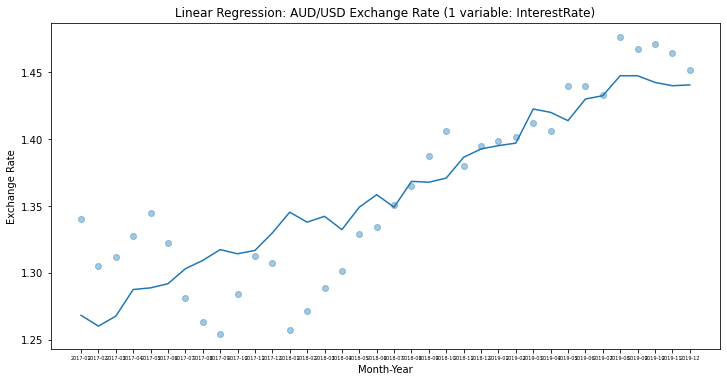

In [9]:
# Visualizing the Linear Regression of Exchange rate and interest rate
month_year = aud_usd_fx['month_year'].astype(str)

plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: AUD/USD Exchange Rate (1 variable: InterestRate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

### Multiple Linear Regression

In [10]:
# Importing the dataset of gdp_difference of Australia and USA
aus_usa_gdp_diff = pd.read_csv('GDP_diff.csv')
aus_usa_gdp2017_2019 = aus_usa_gdp_diff.copy()

In [11]:
aus_usa_gdp2017_2019.head()

,Month-Year,Data
0,2017-01,0.1460
1,2017-02,0.1432
2,2017-03,0.1497
3,2017-04,0.1692
4,2017-05,0.2010


In [12]:
# columns of the dataset
aus_usa_gdp2017_2019.columns

Index(['Month-Year', 'Data'], dtype='object')

In [13]:
# renaming the column names
aus_usa_gdp2017_2019 = aus_usa_gdp2017_2019.rename(columns={'Month-Year':'month_year'})
aus_usa_gdp2017_2019 = aus_usa_gdp2017_2019.rename(columns={'Data':'GDP_diff'})

In [14]:
aus_usa_gdp2017_2019.head()

,month_year,GDP_diff
0,2017-01,0.1460
1,2017-02,0.1432
2,2017-03,0.1497
3,2017-04,0.1692
4,2017-05,0.2010


In [15]:
# extracting the gdp_diff separately
gdp_diff = ["%.4f" %num for num in aus_usa_gdp2017_2019['GDP_diff']]
gdp_diff

['0.1460',
 '0.1432',
 '0.1497',
 '0.1692',
 '0.2010',
 '0.2395',
 '0.2747',
 '0.2969',
 '0.3030',
 '0.3025',
 '0.3085',
 '0.3293',
 '0.3588',
 '0.3842',
 '0.3919',
 '0.3747',
 '0.3297',
 '0.2583',
 '0.1686',
 '0.0701',
 '-0.0283',
 '-0.1212',
 '-0.2047',
 '-0.2754',
 '-0.3293',
 '-0.3629',
 '-0.3751',
 '-0.3705',
 '-0.3559',
 '-0.3377',
 '-0.3206',
 '-0.3075',
 '-0.3003',
 '-0.2996',
 '-0.3057',
 '-0.3182']

In [16]:
# Linear Regression with multiple independent variable (interest rate & GDP Rates)

# x_ir_gdp = [interest rate, GDP difference of Australia and USA]
# y_fx = Exchange Rate

x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)))
x_ir_gdp = x_ir_gdp.astype(np.float)

model.fit(x_ir_gdp, y_fx)

# predicting the exchange rate w.r.t x_ir_gdp
y_fx_predict_2 = model.predict(x_ir_gdp)
print(y_fx_predict_2)

print()

# Accuracy of the model
print('R-squared Error: ', model.score(x_ir_gdp, y_fx))

C:\Users\AneervanRay\Anaconda_3\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
C:\Users\AneervanRay\Anaconda_3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


[1.30832972 1.30599552 1.30752859 1.31127279 1.30665196 1.30160873
 1.29986808 1.29848125 1.30029156 1.2993022  1.29920467 1.30039129
 1.30105175 1.2944545  1.29472833 1.29403893 1.30695391 1.32149501
 1.33252889 1.3547921  1.37019956 1.38601637 1.40461582 1.41797706
 1.42738878 1.43336409 1.44406445 1.44247921 1.43802397 1.44069207
 1.43883239 1.44188264 1.44073963 1.43891853 1.43903194 1.44123008]

R-squared Error:  0.8720883850071521


After adding another variable to the model, R-squared has improved quite significantly, from __72%__ to __87.2%__. Let’s compare it visually against the first line we created

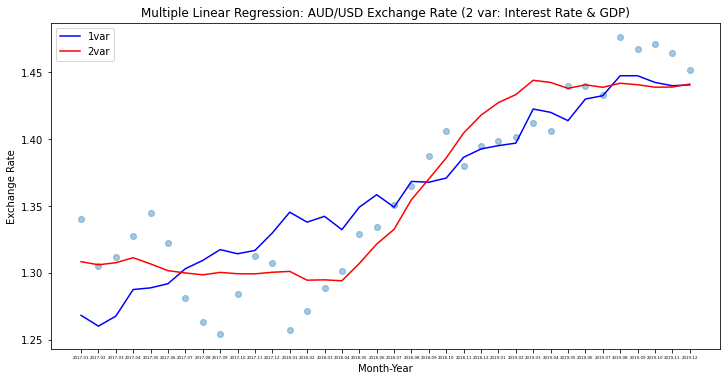

In [17]:
# Visualizing the Multiple Linear Regression of Exchange rate w.r.t interest rate and GDP rates
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b') # interest rate
plt.plot(month_year, y_fx_predict_2, color='r') # interest rate and GDP difference
plt.legend(['1var', '2var'])
plt.title("Multiple Linear Regression: AUD/USD Exchange Rate (2 var: Interest Rate & GDP)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

Let’s try adding another independent variable to our model, __Unemployment Rate (UER)__ difference of Australia and USA.

In [18]:
# Importing the dataset of unemployment rate difference of Australia and USA
unemployment_rate = pd.read_csv('UER DATA.csv')
uer_df = unemployment_rate.copy()

In [19]:
uer_df.head()

,Month-Year,Data
0,2017-01,1.1049
1,2017-02,1.5569
2,2017-03,1.5852
3,2017-04,1.3909
4,2017-05,1.3773


In [20]:
# columns of the dataset
uer_df.columns

Index(['Month-Year', 'Data'], dtype='object')

In [21]:
# renaming the column names
uer_df = uer_df.rename(columns={'Month-Year':'month_year'})
uer_df = uer_df.rename(columns={'Data':'UER_diff'})

In [33]:
uer_df.head()

,month_year,UER_diff
0,2017-01,1.1049
1,2017-02,1.5569
2,2017-03,1.5852
3,2017-04,1.3909
4,2017-05,1.3773


In [22]:
# extracting the uenemployment rate difference
uer_diff_all = uer_df['UER_diff']

In [23]:
uer_diff = ["%.4f" % num for num in uer_diff_all]
uer_diff

['1.1049',
 '1.5569',
 '1.5852',
 '1.3909',
 '1.3773',
 '1.4156',
 '1.2700',
 '1.3390',
 '1.5011',
 '1.3424',
 '1.4384',
 '1.6143',
 '1.4627',
 '1.6988',
 '1.6145',
 '1.8452',
 '1.5477',
 '1.6628',
 '1.6205',
 '1.6746',
 '1.4033',
 '1.4193',
 '1.2982',
 '1.1261',
 '1.2693',
 '1.2660',
 '1.5775',
 '1.6893',
 '1.6890',
 '1.6503',
 '1.7533',
 '1.8396',
 '1.8146',
 '1.8720',
 '1.7240',
 '1.5248']

In [24]:
# Linear Regression with multiple independent variable (interest rate, GDP Rates & Unemployment Rates)

# x_ir_gdp_uer = [interest rate, GDP difference and unemployment rate difference of Australia and USA]
# y_fx = Exchange Rate

x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)))
x_ir_gdp_uer = x_ir_gdp_uer.astype(np.float)

model.fit(x_ir_gdp_uer, y_fx)

# predicting the exchange rate w.r.t to x_ir_gdp_uer
y_fx_predict_3 = model.predict(x_ir_gdp_uer)
print(y_fx_predict_3)

print()

# Accuracy of the model
print('R-squared error: ', model.score(x_ir_gdp_uer, y_fx))

[1.29968787 1.32378504 1.32525747 1.31398611 1.30755413 1.30301186
 1.29020524 1.29082406 1.29980318 1.29072335 1.29525475 1.30302309
 1.29159361 1.29873334 1.29334076 1.30767801 1.30219049 1.32309064
 1.33593521 1.35998795 1.3631849  1.38168585 1.39279783 1.39734783
 1.41553044 1.42183466 1.44500294 1.44991259 1.44626614 1.44320987
 1.44607534 1.45063089 1.44792988 1.45020224 1.44283691 1.43431186]

R-squared error:  0.8889382199971626


C:\Users\AneervanRay\Anaconda_3\lib\site-packages\ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
C:\Users\AneervanRay\Anaconda_3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


R-squared has improved a bit better, from __87.2%__ to __88.9%__. Not too bad, statistically and visually.

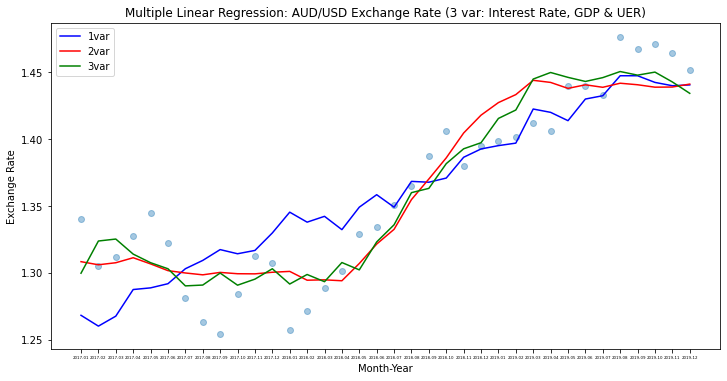

In [25]:
# Visualizing the Multiple Linear Regression of Exchange rate w.r.t interest rate, GDP rates and UER Rates
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b') # interest rates
plt.plot(month_year, y_fx_predict_2, color='r') # interest rate, GDP rate
plt.plot(month_year, y_fx_predict_3, color='g') # interest rate, GDP rate, UER rate
plt.legend(['1var', '2var', '3var'])
plt.title("Multiple Linear Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

### Ploynomial Regression

In [26]:
# Polynomial Regreesion for the latest model to find the best fit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=4)

# converting the independent variables from linearly to polynomial
x_poly = poly.fit_transform(x_ir_gdp_uer)

poly_model = LinearRegression()
poly_model.fit(x_poly, y_fx)
y_pred = poly_model.predict(x_poly)
print(y_pred)

print()

# Accuracy of the model
print('R-squared error: ', poly_model.score(x_poly, y_fx))

[1.33993125 1.30490112 1.31184435 1.32743669 1.34443259 1.32282114
 1.28128314 1.26362848 1.25455332 1.28423715 1.31229091 1.30706143
 1.25717139 1.27144432 1.28835869 1.30173635 1.32926369 1.33420873
 1.35098362 1.36511874 1.38796449 1.40601087 1.3796432  1.3950603
 1.39979339 1.40040159 1.41319275 1.4061451  1.44006515 1.43727231
 1.43351126 1.47712708 1.46598816 1.47081494 1.4666605  1.45207095]

R-squared error:  0.9998889832100236


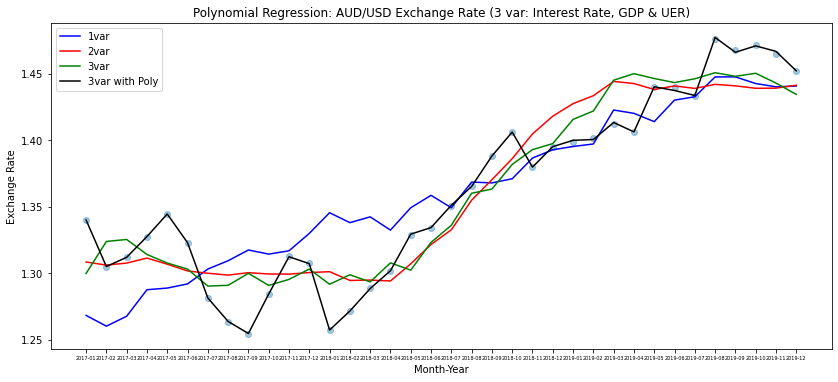

In [27]:
# Visualizing the Polynomial Regression 
plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b') # interest rates
plt.plot(month_year, y_fx_predict_2, color='r') # interest rate, GDP rate
plt.plot(month_year, y_fx_predict_3, color='g') # interest rate, GDP rate, UER rate
plt.plot(month_year, y_pred, color='black')  # Polynomial Regression graph
plt.legend(['1var', '2var', '3var', '3var with Poly'])
plt.title("Polynomial Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

Now to find out which degree of polynomial regression will be the best one so that it will be __neither underfit nor overfit__ the data.

We are testing the degrees from the range __1 to 10__ and correspondingly comparing between two error calculation techniques i.e __R-Squared Error__ and __Mean-Squared Error[MSE]__.<br>
__The higher the better for R-Squared, the lower the better of MSE__

In [28]:
from sklearn.metrics import mean_squared_error

r_squared_list = []
mse_list = []

for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_ir_gdp_uer)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_fx)
    y_pred = model_poly.predict(x_poly)
    
    r_squared = model_poly.score(x_poly, y_fx)
    mse = mean_squared_error(y_pred, y_fx)
    
    r_squared_list.append(r_squared)
    mse_list.append(mse)

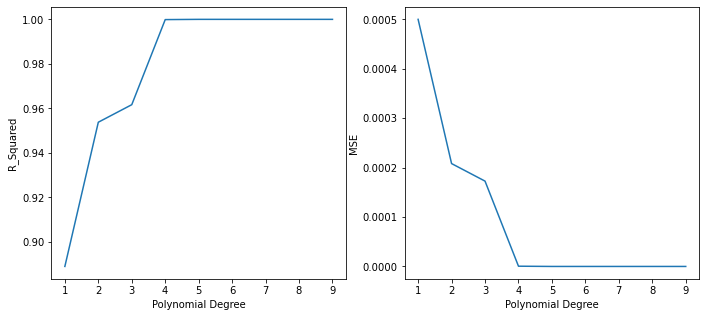

In [34]:
# Visulaizing the R-Squared and MSE plots
plt.figure(figsize=(10,5))

# Plotting of R-Squared Error
ax1 = plt.subplot(1,2,1)
plt.plot(range(1,10), r_squared_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("R_Squared")

# Plotting of Mean Squared Error
ax2 = plt.subplot(1,2,2)
plt.plot(range(1,10), mse_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")

plt.subplots_adjust(0.0005)

plt.show()

The plots peaks at degree of 4 and no further improvement is seen since the degree of 5. This means that degree of 4 brings out the best accuracy score for our model. So let’s stick with 4 then.

### Ridge Regression and Lasso Regression

To check whether in our model overfitting has occurred or not

In [59]:
# Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=0.001)
ridge.fit(x_ir_gdp_uer, y_fx)

y_fx_ridge = ridge.predict(x_ir_gdp_uer)
print('Ridge Regression error: ', ridge.score(x_ir_gdp_uer, y_fx))

# Lasso Regression
lasso = Lasso(alpha=0.001)
lasso.fit(x_ir_gdp_uer, y_fx)

y_fx_lasso = lasso.predict(x_ir_gdp_uer)
print('Lasso Regression error: ', lasso.score(x_ir_gdp_uer, y_fx))

Ridge Regression error:  0.888937878176665
Lasso Regression error:  0.8703105846376477


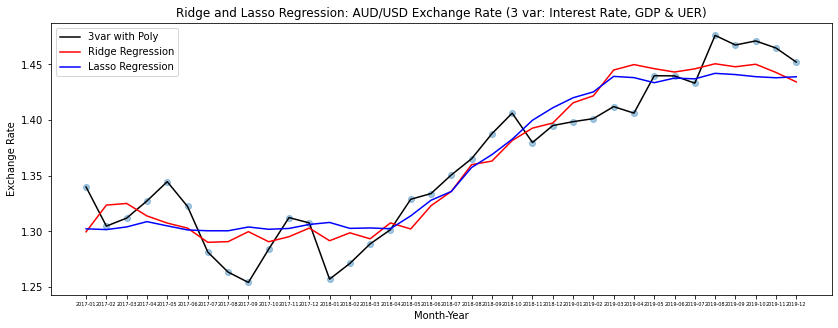

In [61]:
# Visualizing Ridge and Lasso Regression
plt.figure(figsize=(14,5))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_pred, color='black')
plt.plot(month_year, y_fx_ridge, color='r')
plt.plot(month_year, y_fx_lasso, color='b')
plt.legend(['3var with Poly', 'Ridge Regression', 'Lasso Regression'])
plt.title("Ridge and Lasso Regression: AUD/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

R-Squared of Ridge is 88% while of Lasso is 87%. Not too bad when we compare these numbers with our Multiple Linear Regression (88.9%). This proves that overfitting does not occur to our model.

In short, we have __found the line that best fits our dataset.__